# Opis zbioru oraz przedstawienie zmiennych
W projekcie zastosowano 2 osobne zbiory danych dotyczących przynależności klubowej w piłce nożnej w 2021 roku, bazując na grze o nazwie FIFA. W tej grze wszystkie cechy zawodników jak i druzyn są odwzorowane tak, jak w rzeczywistości np. wzrost, waga zawodników lub budżet transferowy drużyn. 
Pierwszym z nich jest zbiór, który opisuje 19156 zawodników.
Każdy zawodnik jest opisany przez poniższe cechy:
- **Name** - nazwa zawodnika, najczęsciej jest to Imię i Nazwisko, np. str R.Lewandowski
- **Age** - wiek zawodnika, np. int 32
- **Height** - wzrost zawodnika, np. int 185
- **Weight** - waga zawodnika np. int 81 
- **Nationality** -  narodowość zawodnika, np. str Poland 
- **Overall** - ocena zawodnika, podsumowuje jego umiejętności w skali od 0-100, im więcej tym lepiej, np. int 92
- **Potential** - potencjalna ocena zawodnika w przyszłych sezonach, pod warunkiem dalszego rozwoju  w skali od 0-100, im więcej tym lepiej, np. int 92
- **BaseStats** - suma statystyk umiejętności uniwersalnych na każdej z pozycji (siła, kondycja), im więcej tym lepiej, np. 460
- **TotalStats** - suma statystyk rozszerzona o statystyki dotyczące zawodników z pola takie jak *Markowanie strzału*,*Strzały z pola karnego*, *Wślizgi*,*Atak*,*Obrona*,*Movement* im więcej tym lepiej np. int  2212
- **BestPosition**  - pozycja, na której dany zawodnik czuje się najlepiej np. str ST
- **Club** -  przynależność klubowa zawodnika, np. str *Bayern München*
- **WageEUR** - pensja tygodniowa zawodnika rozliczana w euro, np. int 270000
- **PreferredFoot** - preferowana noga przy strzałach, np. str Right
- **WeakFoot** - ocena słabszej nogi w skali od 1-5, im więcej tym lepiej np. int 4
- **AttackingWorkRate** - ocena aktywności w ataku, może przyjąć wartości takie jak *High*,*Medium*, *Low*
- **DefensiveWorkRate** - ocena aktywności w obronie, może przyjąć wartości takie jak *High*,*Medium*, *Low*

W drugim zbiorze znajdziemy aż **736 drużyn piłkarskich** z ponad 56 różnych rozgrywek.
Każda drużyna została opisana przez wiele różnych cech, jednak w tej analizie wykorzystano 4 poniższe kolumny:

- **Name** - nazwa drużyny
- **League** - nazwa ligii w której dana drużyna bierze udział, np. *English Premier League*
- **OverallTeam** - ocena umiejętnośc drużyny, im więcej tym lepiej, np. int 80
- **TransferBudget** - budżet transferowy danej drużyny przedstawiony w euro, np. int 37500000

Oba zbiory danych są dostępne pod adresem *https://www.kaggle.com/cashncarry/fifa-22-complete-player-dataset*.
Dane oryginalne można znaleźć oraz rozszerzyć o dane ze strony *https://sofifa.com/players?col=bs&sort=desc*.

#  Założenia projektu
* Rozstrzygnięcie, która z najpopularniejszych 5 europejskich lig jest najlepsza (hiszpanska, angielska, niemiecka, francuska czy włoska)
* Powiązanie informacji o zawodnikach jak i drużynach w celu uzyskania wyników
* Wykorzystanie nieomawianej biblioteki o nazwie *folium* w celu przygotowania interaktywnego wykresu mapy
* Zastosowanie 2 typow wykresów odnośnie rozkładu czyli boxplot oraz violinplot
* Zastosowanie takich samych kolorów dla omawianych lig piłkarskich 

# Wykresy


* Mapa - informacja o liczbie zawodnikow z danego kraju oraz gdzie jest najwięcej najaktywniejszych zawodników 
* Wykres rozkładów (boxplot/violinplot) - informacja o wieku, zarobkach oraz podstawowych statystykach dla poszczególnych rozgrywek
* Wykres kolumnowy - liczba zawodników w poszczególnych rozgrywkach, liczba najaktywniejszych zawodników w poszczególnych rozgrywkach oraz średnie wynagrodzenie w poszczególnych rozgrywkach. 
* Wykres punktowy - bada zależność między BaseStats a Overall, TotalStats a Overall dla zawodników, a także zależność między Overall a TransferBudget dla drużyny. 

# Transformacje
* filtrowanie lig top 5 : angielska, niemiecka , francuska, wloska 
* skorzystanie z bilbioteki geopy -> wygenerowanie wspolrzednych dla krajów 
* grupowanie wieku w celu obliczenia min, std, min, max -> boxplot
* grupowanie basestats w celu obliczenia mean, std, min, max -> violinplot/boxplot
* grupowanie wynagrodzenia w celu obliczenia sredniej , min oraz max wartosci ->barplot , boxplot
* Encodign wartosci -  string -> int w celu agregacji  13. aktywni zawodnicy 

# Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim

Zanim przejdziemy do załadowania danych, poniżej przedstawiam palety barw dla poszczególnych typów wykresów

In [2]:
# KOMENTARZ
pd.set_option('display.max_columns', None)
box_vio_paleta = sns.color_palette(
    ["#0986F4", "#FFCC00", "#664040", "#E8031B", "#008C45"])
barplot_paleta = sns.color_palette(
    ['#664040', '#FFCC00', '#0986F4', '#008C45', '#E8031B'])
scatterplot_palette = ["#0986F4", "#FFB31A", "#E8031B", "#664040", "#008C45"]

Wczytanie zbioru o zawodnikach oraz usunięcie duplikatów, jeśli takie występują. 

In [3]:
FILE_PLAYERS = r'players_fifa22.csv'
FILE_TEAMS = r'teams_fifa22.csv'

In [4]:
COLS = [
    'Name', 'BestPosition', 'Age', 'Height', 'Weight', 'Nationality',
    'Overall', 'Potential', 'TotalStats', 'BaseStats', 'Club', 'WageEUR',
    'ClubJoined', 'NationalTeam', 'PreferredFoot', 'WeakFoot',
    'AttackingWorkRate', 'DefensiveWorkRate'
]
players = pd.read_csv(filepath_or_buffer=FILE_PLAYERS, usecols=COLS)
players = players.drop_duplicates()
players.head(2)

Name  Age  Height  Weight Nationality  Overall  Potential  \
0        L. Messi   34     170      72   Argentina       93         93   
1  R. Lewandowski   32     185      81      Poland       92         92   

   TotalStats  BaseStats BestPosition                 Club  WageEUR  \
0        2219        462           RW  Paris Saint-Germain   320000   
1        2212        460           ST    FC Bayern München   270000   

   ClubJoined NationalTeam PreferredFoot  WeakFoot AttackingWorkRate  \
0        2021    Argentina          Left         4            Medium   
1        2014       Poland         Right         4              High   

  DefensiveWorkRate  
0               Low  
1            Medium

Wczytanie zbioru o drużynach, na samym wstępie warto zmienić kilka kolumn, aby wykluczyć przyszłe błedy. 

In [5]:
teams = pd.read_csv(filepath_or_buffer=FILE_TEAMS,
                    usecols=[
                        'Name', 'League', 'LeagueId', 'Overall', 'Attack',
                        'Midfield', 'Defence', 'TransferBudget', 'Players',
                        'StartingAverageAge'
                    ])
teams = teams.rename(
    columns={
        'Overall': 'OverallTeam',
        'Attack': 'AttackTeam',
        'Midfield': 'MidfieldTeam',
        'Defence': 'DefenceTeam'
    })
teams = teams.drop_duplicates()
teams.head(2)

Name                      League  LeagueId  OverallTeam  AttackTeam  \
0      Arsenal  English Premier League (1)        13           79          83   
1  Aston Villa  English Premier League (1)        13           78          79   

   MidfieldTeam  DefenceTeam  TransferBudget  Players  StartingAverageAge  
0            81           77        77500000       33                25.1  
1            76           77        37500000       31                24.7

# Przetwarzanie zbioru

W tym krokiu zajmiemy się wybraniem 5 najpopularniejszych lig ze zbioru o drużynach.

## Filtrowanie zbioru -> wybór 5 najpopularniejszych lig

In [6]:
top5_leagues = [
    'English Premier League (1)', 'French Ligue 1 (1)',
    'German 1. Bundesliga (1)', 'Italian Serie A (1)',
    'Spain Primera Division (1)'
]
teams = teams[teams.League.isin(top5_leagues)]

In [7]:
teams.League.value_counts()

Italian Serie A (1)           23
English Premier League (1)    20
French Ligue 1 (1)            20
Spain Primera Division (1)    20
German 1. Bundesliga (1)      18
Name: League, dtype: int64

Jak widzimy powyżej, w lidze włoskiej bierze udział najwięcej, bo 23 drużyny. W lidze angielskiej, hiszpańskiej oraz francuskiej mamy okazję zobaczyć po 20 drużyn, natomiast w lidze niemieckiej występuje na co dzień zaledwie 18 drużyn. 

## Połączenie zbioru o zawodnikach oraz o drużynach

W obu zbiorach widzimy nazwę klubu, dzięki tej kolumnie możemy połączyć oba zbiory. Aby nie doszło do konfliktu między kolumnami, na wszelki wypadek dodajmy sufix który będzie odpowiadał danemu zbiorowi. 

In [8]:
df = players.merge(teams,
                   left_on='Club',
                   right_on='Name',
                   suffixes=('Player', 'Team'))
df = df.drop(columns='Club')
display(len(df))
df.isna().sum()

3019

NamePlayer            0
Age                   0
Height                0
Weight                0
Nationality           0
Overall               0
Potential             0
TotalStats            0
BaseStats             0
BestPosition          0
WageEUR               0
ClubJoined            0
NationalTeam          0
PreferredFoot         0
WeakFoot              0
AttackingWorkRate     0
DefensiveWorkRate     0
NameTeam              0
League                0
LeagueId              0
OverallTeam           0
AttackTeam            0
MidfieldTeam          0
DefenceTeam           0
TransferBudget        0
Players               0
StartingAverageAge    0
dtype: int64

Powyżej zauważamy, iż w połączonym zbiorze nie występują braki w danych. 

## Usunięcie "(1)" z nazw lig

W nazwach lig, widzimy brzydko wyglądające jedynki w nawiasach. Taka sytuacja zachodzi, ponieważ w zbiorze o drużynach mamy informację nie tylko o najwyższych klasach rozgrywkowych, ale także o niższych ligach w poszczególnych krajach.

In [9]:
df.League.value_counts()

English Premier League (1)    638
Italian Serie A (1)           637
Spain Primera Division (1)    622
French Ligue 1 (1)            574
German 1. Bundesliga (1)      548
Name: League, dtype: int64

Aby usunąć (1) zastosowałem ciekawą konstrukcję jaką jest "list comprehension", dzięki czemu nasz kod wygląda dużo przejrzyściej. W tym przypadku rezultatem jest słownik, z kluczem jakim jest oryginalna nazwa drużyny, a wartością jest nazwa drużyny bez (1). W następnym kroku wystarczy zastosować funkcję *replace*, a jako argument zastosujemy słownik.

In [10]:
columns_names = {i: i[:-4] for i in df.League.unique()}
country_league = {
    'English Premier League': 'England',
    'Italian Serie A': 'Italy',
    'Spain Primera Divison': 'Spain',
    'French Ligue 1': 'France',
    'German 1. Bundesliga': 'Germany'
}
df = df.replace(columns_names)
df.head(5)

NamePlayer  Age  Height  Weight Nationality  Overall  Potential  \
0       L. Messi   34     170      72   Argentina       93         93   
1      K. Mbappé   22     182      73      France       91         95   
2      Neymar Jr   29     175      68      Brazil       91         91   
3  G. Donnarumma   22     196      90       Italy       89         93   
4   Sergio Ramos   35     184      82       Spain       88         88   

   TotalStats  BaseStats BestPosition  WageEUR  ClubJoined NationalTeam  \
0        2219        462           RW   320000        2021    Argentina   
1        2175        470           ST   230000        2018       France   
2        2183        454           LW   270000        2017  Not in team   
3        1377        481           GK   110000        2021        Italy   
4        2251        461           CB   115000        2021        Spain   

  PreferredFoot  WeakFoot AttackingWorkRate DefensiveWorkRate  \
0          Left         4            Medium               Low   
1         Right         4              High               Low   
2         Right         5              High            Medium   
3         Right         3            Medium            Medium   
4         Right         3              High            Medium   

              NameTeam          League  LeagueId  OverallTeam  AttackTeam  \
0  Paris Saint-Germain  French Ligue 1        16           86          89   
1  Paris Saint-Germain  French Ligue 1        16           86          89   
2  Paris Saint-Germain  French Ligue 1        16           86          89   
3  Paris Saint-Germain  French Ligue 1        16           86          89   
4  Paris Saint-Germain  French Ligue 1        16           86          89   

   MidfieldTeam  DefenceTeam  TransferBudget  Players  StartingAverageAge  
0            83           85       160000000       33                28.1  
1            83           85       160000000       33                28.1  
2            83           85       160000000       33                28.1  
3            83           85       160000000       33                28.1  
4            83           85       160000000       33                28.1

## Przygotowanie informacji o lokalizacji  dla Narodowości

Następnym korkiem, który musiałem wykonać jest przetworzenie informacji o lokaliacj dla Narodowości oraz Krajów w których są rozgrywane dane rozgrywki.

In [11]:
geolocator = Nominatim(user_agent='myapplication')
location = geolocator.geocode("Argentina")
print(location.latitude)

-34.9964963


Tworzę nowe kolumny w zbiorze danych dla szerokości oraz długości geograficznej. Następnie dla każdej nazwy Kraju, tworzę słownik w którym kluczem jest narodowość a wartościami są odpowiednie koordynaty geograficzne. 

In [12]:
df['NationalityLatitude'] = df.Nationality
df['NationalityLongitude'] = df.Nationality
geolocator = Nominatim(user_agent='myapplication')
lat = {i: geolocator.geocode(i).latitude for i in df.Nationality.unique()}
long = {i: geolocator.geocode(i).longitude for i in df.Nationality.unique()}
df.NationalityLongitude.replace(long, inplace=True)
df.NationalityLatitude.replace(lat, inplace=True)

In [13]:
len(df)

3019

# Liczba zawodników w 5 najpopularniejszych  ligach

Pierwszym krokiem w analizie będzie przedstawienie najważniejszych zależności w zbiorze danych. Wobec tego sprawdźmy ilu zawodników gra w każdej z lig.

In [14]:
number_players_per_league = df.League.value_counts().reset_index().rename(
    columns={
        'index': 'Nazwa Ligii',
        'League': 'Liczba zawodników'
    })
number_players_per_league

Nazwa Ligii  Liczba zawodników
0  English Premier League                638
1         Italian Serie A                637
2  Spain Primera Division                622
3          French Ligue 1                574
4    German 1. Bundesliga                548

Text(0.5, 1.0, 'Liczba zawodników w 5 najpopularniejszych ligach  ')

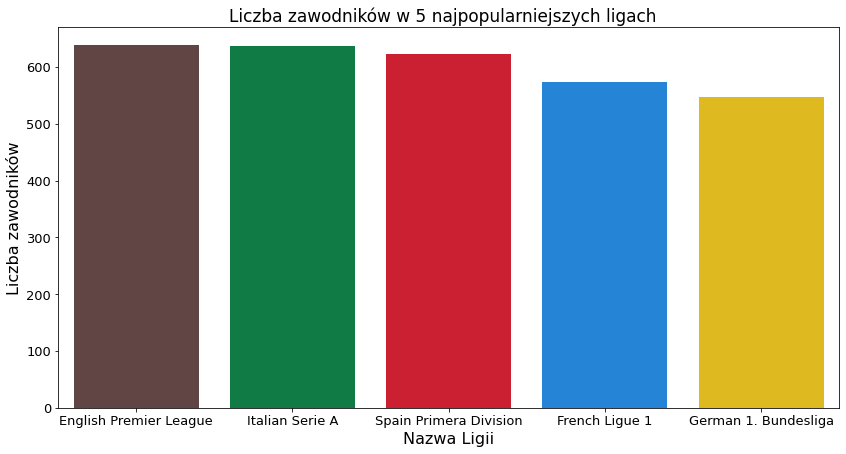

In [15]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x="Nazwa Ligii",
    y="Liczba zawodników",
    data=number_players_per_league,
    palette=['#664040', '#008C45', '#E8031B', '#0986F4', '#FFCC00'])
ax.set_xlabel('Nazwa Ligii', fontsize=16)
ax.set_ylabel('Liczba zawodników', fontsize=16)
ax.tick_params(labelsize=13)
ax.axes.set_title(f"Liczba zawodników w 5 najpopularniejszych ligach  ",
                  fontsize=17)

Jak widzimy powyżej różnice w wartościach nie są duże. O dziwo liga włoska pomimo największej liczby drużyn nie posiada największej liczby zawodników. W lidze francuskiej oraz niemieckiej zauważamy najmniejszą liczbę zawodników.

# Rozkład wieku oraz BaseStats - podstawowych statystyk

Sprawdźmy, więc jak wyglądają rozkłady wieku oraz BaseStats. Jak wiadomo, większość piłkarzy swoje największe sukcesy osiągają pomiędzy 24 a 30 wiekiem życia. Wobec tego uzasadnionym jest sprawdzenie jak takie cechy wyglądają w każdej z ligi. Kolejną interesującą cechą jest BaseStats - podstawowe statystyki zawodnika, w tym aspekcie sprawdzamy jak bardzo uniwersalni atleci grają w każdej z lig.

## Wiek

In [16]:
df.groupby('League').agg(mean_ages=('Age', 'mean'),
                         std_age=('Age', 'std'),
                         min_ages=('Age', 'min'),
                         max_ages=('Age', 'max'))

mean_ages   std_age  min_ages  max_ages
League                                                         
English Premier League  24.418495  4.812866        16        38
French Ligue 1          24.294425  4.708101        17        40
German 1. Bundesliga    24.414234  4.460054        17        37
Italian Serie A         25.778650  4.658763        16        43
Spain Primera Division  25.477492  4.630151        16        39

Text(0.5, 1.0, 'Rozkład wieku w 5 najpopularniejszych ligach  ')

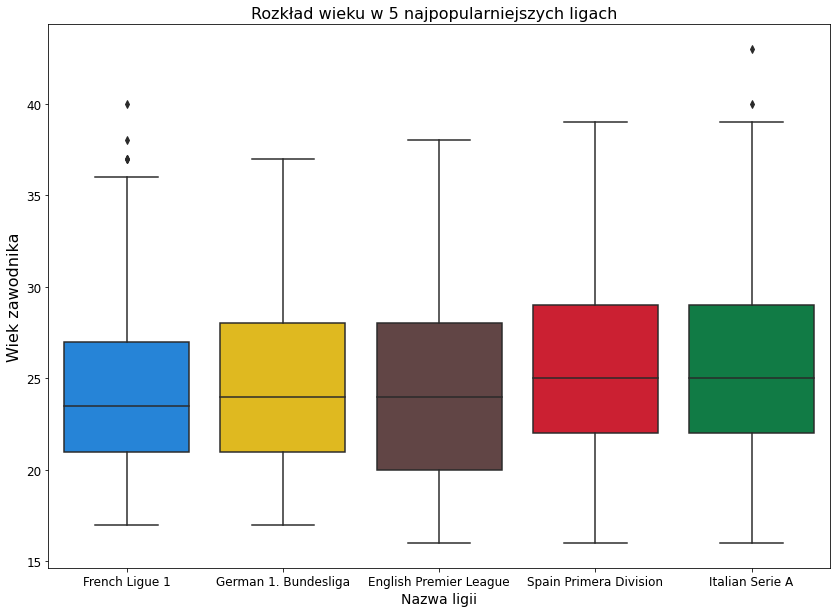

In [17]:
plt.figure(figsize=(14, 10))
ax = sns.boxplot(x="League", y="Age", data=df, palette=box_vio_paleta)
plt.xlabel("Nazwa ligii", fontsize=14)
plt.ylabel("Wiek zawodnika", fontsize=16)
ax.tick_params(labelsize=12)
ax.axes.set_title(f"Rozkład wieku w 5 najpopularniejszych ligach  ",
                  fontsize=16)

Jak widzimy na powyższym wykresie dotyczącym rozkładu cechy Age największy przekrój wiekowy występuje w lidze angielskiej. Najniższym możliwym wiekiem 16 lat, natomiast w Anglii oraz we Francji jest to 17 lat. W lidze włoskiej zauważymy 2 piłkarzy, którzy są "traktowani" jako outlierzy pod względem wieku. Co ciekawe średnia wieku oraz odchylenie są bardzo podobne dla każdej z lig.

## BaseStats - podstawowe statystyki

In [18]:
df.groupby('League').agg(mean_BaseStats=('BaseStats', 'mean'),
                         std_BaseStats=('BaseStats', 'std'),
                         min_BaseStats=('BaseStats', 'min'),
                         max_BaseStats=('BaseStats', 'max'))

mean_BaseStats  std_BaseStats  min_BaseStats  \
League                                                                 
English Premier League      387.470219      48.162776            273   
French Ligue 1              378.832753      41.105320            275   
German 1. Bundesliga        381.857664      42.425866            272   
Italian Serie A             384.062794      42.710549            247   
Spain Primera Division      390.779743      41.701856            289   

                        max_BaseStats  
League                                 
English Premier League            501  
French Ligue 1                    482  
German 1. Bundesliga              501  
Italian Serie A                   480  
Spain Primera Division            491

Text(0.5, 1.0, 'Rozkład BaseStats - podstawowe statystyki zawodnika w 5 najpopularniejszych ligach  ')

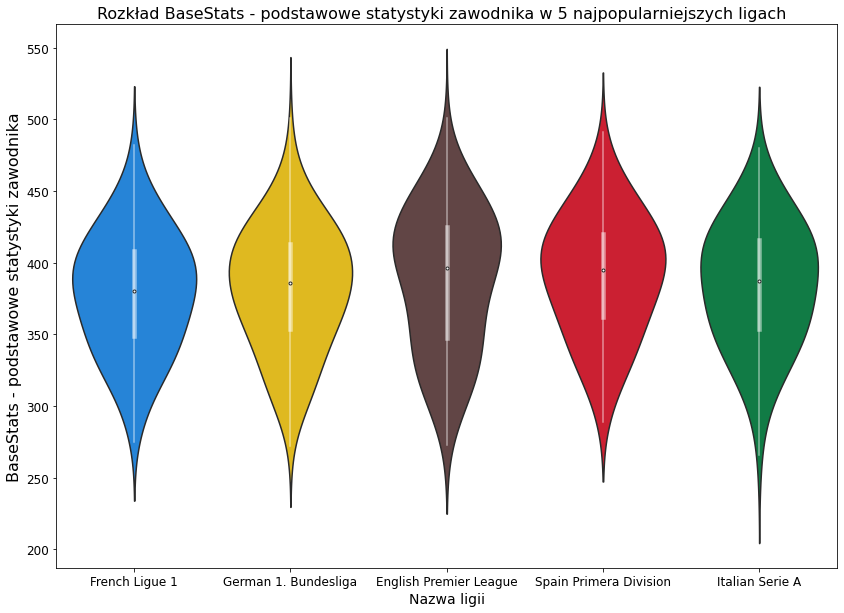

In [19]:
# komentarz
plt.figure(figsize=(14, 10))
ax = sns.violinplot(x="League",
                    y="BaseStats",
                    data=df,
                    palette=box_vio_paleta,
                    bw=.5,
                    inner='box')
for l in ax.lines:
    l.set_linestyle('solid')
    l.set_color('white')
    l.set_alpha(0.5)
plt.xlabel("Nazwa ligii", fontsize=14)
plt.ylabel("BaseStats - podstawowe statystyki zawodnika", fontsize=16)
ax.tick_params(labelsize=12)
ax.axes.set_title(
    f"Rozkład BaseStats - podstawowe statystyki zawodnika w 5 najpopularniejszych ligach  ",
    fontsize=16)

Text(0.5, 1.0, 'Rozkład BaseStats w 5 najpopularniejszych ligach  ')

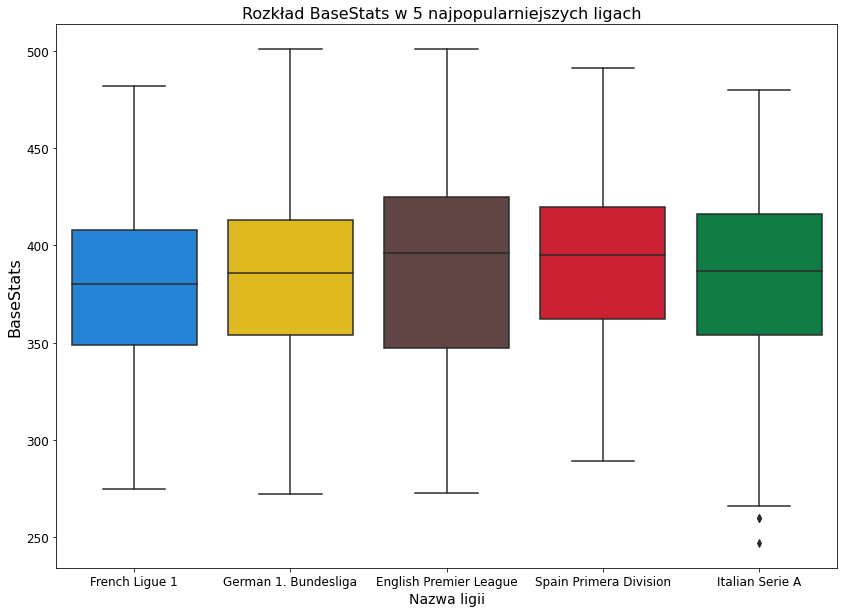

In [20]:
#komentarz
plt.figure(figsize=(14, 10))
ax = sns.boxplot(x="League", y="BaseStats", data=df, palette=box_vio_paleta)
plt.xlabel("Nazwa ligii", fontsize=14)
plt.ylabel("BaseStats", fontsize=16)
ax.tick_params(labelsize=12)
ax.axes.set_title(f"Rozkład BaseStats w 5 najpopularniejszych ligach  ",
                  fontsize=16)

Zauważamy tutaj bardzo podobną sytuację co w przypadku kolumny Age. Co ciekawe biorąc pod uwagę BaseStats liga włoska wypada gorzej na tle innych lig. To właśnie w tej lidze zauważymy 2 najgorszych piłkarzy w badanym zbiorze. Po raz kolejny najlepiej wypada liga angielska, w której znajdziemy zarówno zawodników posiadających wartość BaseStats równa 501 (max w zbiorze) oraz drugą najlepszą średnią wartość BaseStats. Najlepiej pod tym względem wypadła liga hiszpanska.

#  Średnia tygodniowa pensja zawodników w ligach top5

In [21]:
df_mean_wage = df.groupby('League').agg(
    mean_wage_per_league=('WageEUR', 'mean')).reset_index()
df_mean_wage['mean_wage_per_league'] = df_mean_wage.mean_wage_per_league.round(
    2)
df_mean_wage = df_mean_wage.sort_values(by=['mean_wage_per_league'],
                                        ascending=False)
df_mean_wage

League  mean_wage_per_league
0  English Premier League              50551.25
4  Spain Primera Division              31269.37
3         Italian Serie A              28099.53
2    German 1. Bundesliga              24417.24
1          French Ligue 1              21393.73

## Barplot

[Text(0, 0.0, '0'),
 Text(0, 10000.0, '10,000'),
 Text(0, 20000.0, '20,000'),
 Text(0, 30000.0, '30,000'),
 Text(0, 40000.0, '40,000'),
 Text(0, 50000.0, '50,000'),
 Text(0, 60000.0, '60,000')]

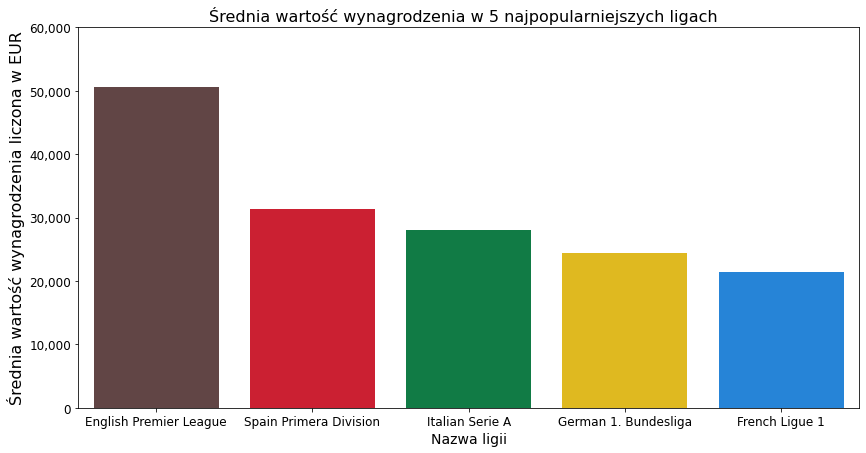

In [22]:
#komentarz
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x="League",
    y="mean_wage_per_league",
    data=df_mean_wage,
    order=df_mean_wage.League,
    palette=['#664040', '#E8031B', '#008C45', '#FFCC00', '#0986F4'])
plt.xlabel("Nazwa ligii", fontsize=14)
plt.ylabel("Średnia wartość wynagrodzenia liczona w EUR", fontsize=16)
ax.tick_params(labelsize=12)
ax.axes.set_title(
    f"Średnia wartość wynagrodzenia w 5 najpopularniejszych ligach  ",
    fontsize=16)
label_format = '{:,.0f}'
ticks_loc = ax.get_yticks().tolist()
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels([label_format.format(x) for x in ticks_loc])

## Violin oraz Boxplot Wages

In [23]:
df.groupby('League').agg(mean_wages=('WageEUR', 'mean'),
                         min_wages=('WageEUR', 'min'),
                         max_wages=('WageEUR', 'max'))

mean_wages  min_wages  max_wages
League                                                    
English Premier League  50551.253918        500     350000
French Ligue 1          21393.728223        500     320000
German 1. Bundesliga    24417.244526        500     270000
Italian Serie A         28099.529042        550     160000
Spain Primera Division  31269.372990        500     350000

Text(0.5, 1.0, 'Rozkład wynagrodzenia w 5 najpopularniejszych ligach  ')

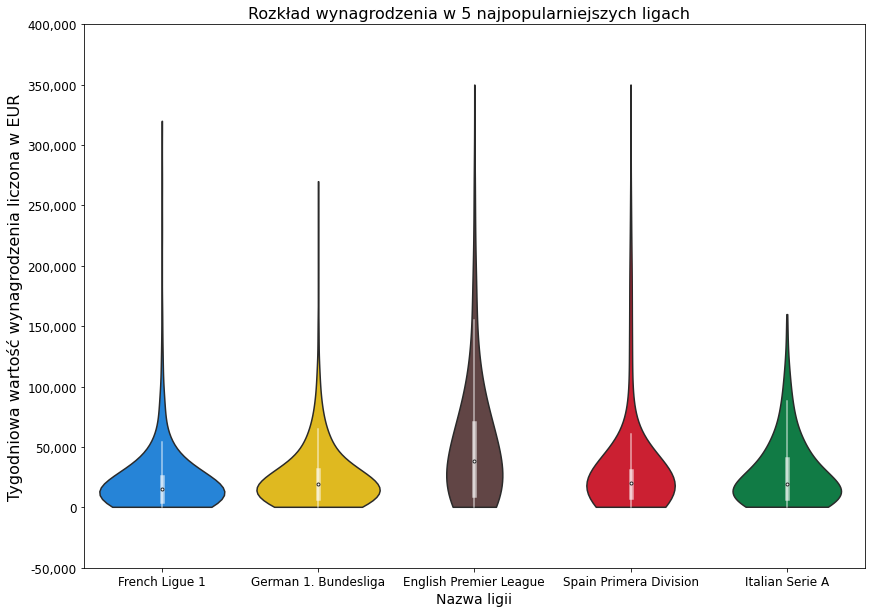

In [24]:
#komentarz
plt.figure(figsize=(14, 10))
ax = sns.violinplot(x="League",
                    y="WageEUR",
                    data=df,
                    bw=.5,
                    inner='box',
                    cut=0,
                    palette=box_vio_paleta)
for l in ax.lines:
    l.set_linestyle('solid')
    l.set_color('white')
    l.set_alpha(0.6)
label_format = '{:,.0f}'
ticks_loc = ax.get_yticks().tolist()
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels([label_format.format(x) for x in ticks_loc])
plt.xlabel("Nazwa ligii", fontsize=14)
plt.ylabel("Tygodniowa wartość wynagrodzenia liczona w EUR", fontsize=16)
ax.tick_params(labelsize=12)
ax.axes.set_title(f"Rozkład wynagrodzenia w 5 najpopularniejszych ligach  ",

                  fontsize=16)

Text(0.5, 1.0, 'Rozkład wynagrodzenia w 5 najpopularniejszych ligach  ')

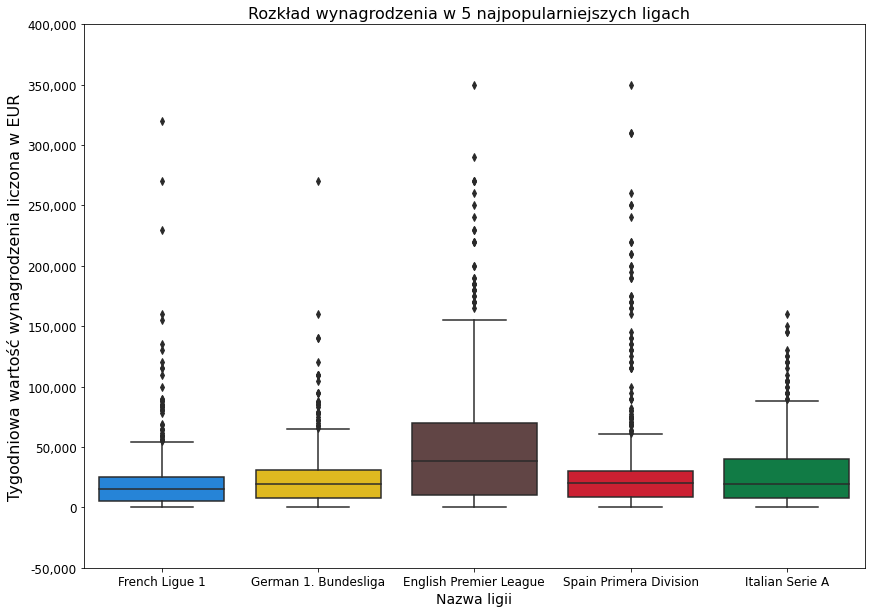

In [25]:
#komentarz
plt.figure(figsize=(14, 10))
ax = sns.boxplot(x="League", y="WageEUR", data=df, palette=box_vio_paleta)
label_format = '{:,.0f}'
ticks_loc = ax.get_yticks().tolist()
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels([label_format.format(x) for x in ticks_loc])
plt.xlabel("Nazwa ligii", fontsize=14)
plt.ylabel("Tygodniowa wartość wynagrodzenia liczona w EUR", fontsize=16)
ax.tick_params(labelsize=12)
ax.axes.set_title(f"Rozkład wynagrodzenia w 5 najpopularniejszych ligach  ",
                  fontsize=16)

Jak dobrze wiemy, im lepszy pracownik tym większą pensję może uzyskać  ;) W tym przypadku może być podobnie, aczkolwiek z opracowanych wykresów możemy stwierdzić na pewno, że piłakrze zarabiają ogromne pieniądze. Na wykresie boxplot widzimy wiele outlierów, jednak to są najlepsi zawodnicy na świecie, więc ich wynagrodzenie jest podbijane wraz z osiąganymi sukcesami. Niemniej jednak wielkości pudełek największe są w Anglii, oczywiście może to świadczyć o tym, iż w Anglii kluby płacą najwięcej, ale także że zawodnicy mogą żądać większe wynagrodzenie które odpowiada ich umiejętnościom.

# Pochodzenie zawodników w top 5 ligach

In [26]:
df.value_counts(['Nationality']).head(20)

Nationality  
Spain            458
France           410
Germany          284
England          280
Italy            259
Brazil            97
Netherlands       73
Argentina         71
Portugal          62
Belgium           50
Senegal           43
Denmark           40
Serbia            37
Poland            37
Austria           35
Switzerland       35
Croatia           34
Côte d'Ivoire     33
Uruguay           29
Nigeria           27
dtype: int64

Sprawdźmy, z jakich krajów pochodzą zawodnicy grający w najlepszych ligach. Na takim wykresie zauważymy jakiem narodowości są cenione. Możemy także przypuszczać, że siła danej ligii pochodzi z jakości piłkarzy danego kraju, poziomu szkolenia oraz ich umiejętności. 

In [27]:
import folium
from folium.plugins import MarkerCluster  #empty map

world_map = folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
for i in range(len(df)):
    lat = df.iloc[i]['NationalityLatitude']
    long = df.iloc[i]['NationalityLongitude']
    radius = 5
    popup_text = """Kraj : {}<br>
                    Nazwa : {}<br>
                    Liga: {}<br>
                    """
    popup_text = popup_text.format(df.iloc[i]['Nationality'],
                                   df.iloc[i]['NamePlayer'],
                                   df.iloc[i]['NameTeam'])
    folium.CircleMarker(location=[lat, long],
                        radius=radius,
                        popup=popup_text,
                        fill=True).add_to(marker_cluster)
world_map

# Najlepsi zawodnicy dla top 5 ze względu na Overall, BaseStats oraz TotaStats

Na podstawie wykresu punktowego zobaczymy zależność między Overall a BaseStats dla zawodników występujacych w poszczególnych ligach. Jak wiadomo najlepsza liga powinna przyciągać najlepszych zawodników, najlepiej wyszkolonych oraz najlepszych atletów.

Text(0.5, 1.0, 'Zależność pomiędzy BaseStats - podstawowe statystyki zawodnika a Overall - ocena zawodnika w 5 najpopularniejszych ligach')

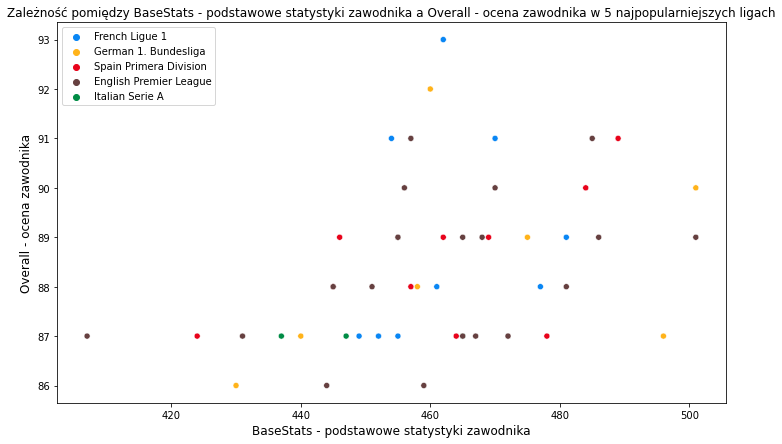

In [28]:
plt.figure(figsize=(12, 7))
df_overall = df.sort_values(by=['Overall'], ascending=False).head(50)
sns.scatterplot(data=df_overall,
                x="BaseStats",
                y="Overall",
                hue='League',
                palette=scatterplot_palette)
plt.legend(loc='upper left')
plt.xlabel("BaseStats - podstawowe statystyki zawodnika", fontsize=12)
plt.ylabel("Overall - ocena zawodnika", fontsize=12)
plt.title(
    f"Zależność pomiędzy BaseStats - podstawowe statystyki zawodnika a Overall - ocena zawodnika w 5 najpopularniejszych ligach",
    fontsize=12)

Inną zależnością jest TotalStats vs BaseStats, tutaj widzimy 2 grupy punktów. Zjawisko to jest spoowodowane, faktem, iż bramkarze posiadają dużo niższe wartości w kolumnie TotalStats niż inne pozycje na boisku. Niemniej jednak, widzimy tutaj podziały na poszczególne ligii i możemy wskazać, iż najczęstszym kolorem pojawiającym się na punktach jest ten oznaczający ligę angielską.

Text(0.5, 1.0, "Zależność pomiędzy TotalStats, a BaseStats w 5 najpopularniejszych ligach dla 50 najlepszych zawodników 'Overall'")

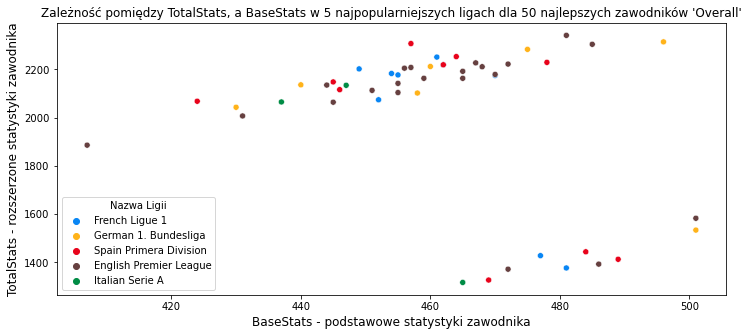

In [29]:
plt.figure(figsize=(12, 5))
df_overall = df.sort_values(
    by=['Overall'],
    ascending=False).head(50).reset_index().drop(columns='index')
sns.scatterplot(data=df_overall,
                x="BaseStats",
                y="TotalStats",
                hue='League',
                marker="o",
                color="black",
                palette=scatterplot_palette)
plt.ylabel("TotalStats - rozszerzone statystyki zawodnika", fontsize=12)
plt.xlabel("BaseStats - podstawowe statystyki zawodnika", fontsize=12)
plt.legend(title='Nazwa Ligii', loc='best')
plt.title(
    f"Zależność pomiędzy TotalStats, a BaseStats w 5 najpopularniejszych ligach dla 50 najlepszych zawodników 'Overall'",
    fontsize=12)

# Zależność między OverallTeam a budżetem transferowym

In [30]:
df_budget = df.drop_duplicates('NameTeam')
df_budget = df_budget[['NameTeam', 'League', 'TransferBudget',
                       'OverallTeam']].sort_values(by='TransferBudget',
                                                   ascending=False)
df_budget = df_budget.reset_index().drop(columns='index')
df_budget_top20 = df_budget.head(10)
df_budget_top20

NameTeam                  League  TransferBudget  OverallTeam
0      Manchester City  English Premier League       176000000           85
1    Manchester United  English Premier League       175000000           84
2  Paris Saint-Germain          French Ligue 1       160000000           86
3       Real Madrid CF  Spain Primera Division       150000000           84
4         FC Barcelona  Spain Primera Division       130000000           83
5             Juventus         Italian Serie A       105000000           83
6    FC Bayern München    German 1. Bundesliga       100000000           84
7                Inter         Italian Serie A        99500000           82
8            Liverpool  English Premier League        95000000           84
9              Chelsea  English Premier League        85000000           83

In [31]:
df_budget_tail20 = df_budget.tail(20).sort_values(by=['OverallTeam'],
                                                  ascending=[False])
df_budget_tail20.head(5)

NameTeam                  League  TransferBudget  \
83   RCD Espanyol de Barcelona  Spain Primera Division         6000000   
86                  CA Osasuna  Spain Primera Division         4800000   
100                   Elche CF  Spain Primera Division         1700000   
90            Deportivo Alavés  Spain Primera Division         4400000   
98                    Cádiz CF  Spain Primera Division         2000000   

     OverallTeam  
83            77  
86            76  
100           75  
90            74  
98            74

Text(0.5, 1.0, 'Zależność pomiędzy budżetem transferowym a OverallTeam - Ocena drużyny 5 najpopularniejszych ligach')

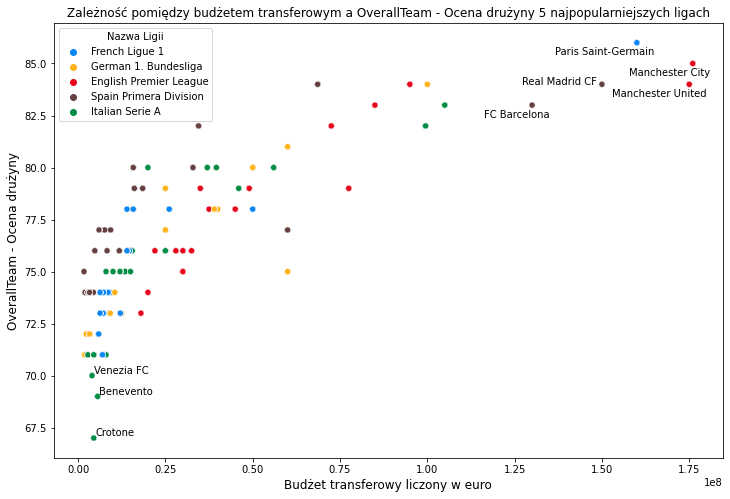

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,
                x="TransferBudget",
                y="OverallTeam",
                hue='League',
                marker="o",
                color="black",
                palette=scatterplot_palette)
for line in range(0, 5):
    if line == 3:
        plt.text(df_budget.TransferBudget[line] - 1500000,
                 df_budget.OverallTeam[line],
                 df_budget.NameTeam[line],
                 ha='right',
                 size='medium',
                 color='black')
    else:
        plt.text(df_budget.TransferBudget[line] + 5000000,
                 df_budget.OverallTeam[line] - 0.6,
                 df_budget.NameTeam[line],
                 ha='right',
                 size='medium',
                 color='black')
for line in df_budget_tail20.index[17:]:
    plt.text(df_budget.TransferBudget[line] + 500000,
             df_budget.OverallTeam[line],
             df_budget.NameTeam[line],
             verticalalignment='bottom',
             size='medium',
             color='black')

plt.legend(title='Nazwa Ligii', loc='upper left')
plt.xlabel("Budżet transferowy liczony w euro", fontsize=12)
plt.ylabel("OverallTeam - Ocena drużyny", fontsize=12)
plt.title(
    f"Zależność pomiędzy budżetem transferowym a OverallTeam - Ocena drużyny 5 najpopularniejszych ligach",
    fontsize=12)

Zależność między budżetem a OverallTeam wskazuje z pewnością na najbogatsze kluby na świecie. Jednak wraz z pieniędzmi powinna iśc także jakość. Na tym wykresie widzimy 2 najbogatsze kluby angielskie, następnie klub francuski, który ocene w grze uzyskał najlepszą. Na samym dole stawki z najmniejszymi budżetami oraz najniszą oceną pojawiają się klub z Włoch. Co ciekawe dość dużo klubów z Hiszpanii posiada wysoki Overall przy stosunkowo niskich budżetach,

# Aktywni zawodnicy w ataku i w obronie

Ostatnim wskaźnikiem, który chciałbym zaprezentować jest kombinacja aktywności w ataku oraz aktywności  w obroni dla danego zawodnika. Na początku musimy zakodować poszczególne nazwy na liczby aby obliczyć średnią.

In [33]:
encoding_values = {'High': 3, 'Medium': 2, 'Low': 1}
df['AttackingWorkRateEN'] = df.AttackingWorkRate
df['AttackingWorkRateEN'] = df.AttackingWorkRate.replace(encoding_values)
df['DefensiveWorkRateEN'] = df.DefensiveWorkRate
df['DefensiveWorkRateEN'] = df.DefensiveWorkRate.replace(encoding_values)
df['WorkRate'] = (df.AttackingWorkRateEN + df.DefensiveWorkRateEN) / 2

In [34]:
df_work_rate = df[df.WorkRate == 3]
print("Liczba zawodników, którzy ciężko pracują w ataku oraz w obronie: ",
      len(df_work_rate))

Liczba zawodników, którzy ciężko pracują w ataku oraz w obronie:  220


W odfiltrowanym zbiorze znajduje sie zaledwie 220 zawodników z ponad około 3000, którzy pracują zarówno w obronie jak i ataku na najwyższym poziomie.

In [35]:
league_of_most_active_players = df_work_rate.League.value_counts().reset_index(
).head(20).rename(columns={
    'index': 'Nazwa Ligii',
    'League': 'Liczba zawodników'
})
league_of_most_active_players

Nazwa Ligii  Liczba zawodników
0  English Premier League                 78
1    German 1. Bundesliga                 44
2          French Ligue 1                 36
3         Italian Serie A                 33
4  Spain Primera Division                 29

Jak widzimy najwięcej z nich gra na co dzień w lidze angielskiej, a najmniej w lidze hiszpańskiej. 

Text(0.5, 1.0, 'Liczba najaktywniejszych zawodników w poszczególnych 5 najpopularniejszych ligach')

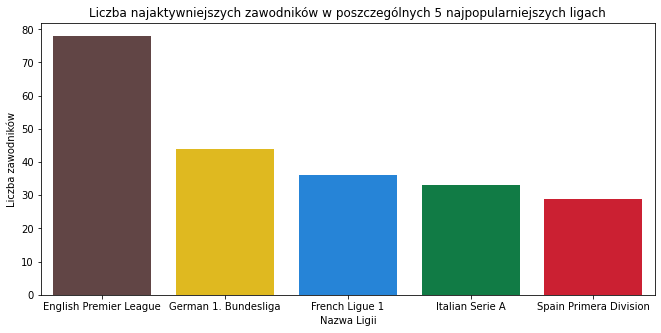

In [36]:
plt.figure(figsize=(11, 5))
ax = sns.barplot(x="Nazwa Ligii",
                 y="Liczba zawodników",
                 data=league_of_most_active_players,
                 order=league_of_most_active_players['Nazwa Ligii'],
                 palette=barplot_paleta)
plt.title(
    f"Liczba najaktywniejszych zawodników w poszczególnych 5 najpopularniejszych ligach",
    fontsize=12)

Widzimy, że najaktywniejsi zawodnicy najczęściej grają w lidze angielskiej. Warto sprawdzić także czy Ci zawodnicy pochodzą także z Wielkiej Brytanii, czy tylko są zakontraktowani w tej lidze. Wobec tego sprawdźmy narodowość tych zawodników.

In [37]:
df_work_rate.Nationality.value_counts().reset_index().head(20)

index  Nationality
0          England           27
1           France           25
2            Spain           22
3          Germany           20
4        Argentina           12
5            Italy           12
6          Belgium            9
7           Brazil            7
8         Scotland            7
9         Portugal            6
10         Finland            4
11         Austria            4
12  Czech Republic            4
13          Poland            4
14   United States            4
15   Côte d'Ivoire            3
16         Nigeria            3
17         Uruguay            3
18         Algeria            3
19          Canada            2

In [38]:
world_map = folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
for i in range(len(df_work_rate)):
    lat = df_work_rate.iloc[i]['NationalityLatitude']
    long = df_work_rate.iloc[i]['NationalityLongitude']
    radius = 5
    popup_text = """Narodowość zawodnika : {}<br>
                    Nazwa : {}<br>
                    Drużyna: {}<br>
                    """
    popup_text = popup_text.format(df_work_rate.iloc[i]['Nationality'],
                                   df_work_rate.iloc[i]['NamePlayer'],
                                   df_work_rate.iloc[i]['NameTeam'])
    folium.CircleMarker(location=[lat, long],
                        radius=radius,
                        popup=popup_text,
                        fill=True).add_to(marker_cluster)  #show the map
world_map